## Recap of word2vec embeddings 

In [219]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')

import numpy as np
import pandas as pd
import networkx as nx

import os
import warnings
warnings.filterwarnings("ignore")

from gensim.models import Word2Vec, KeyedVectors
from gensim.test.utils import datapath
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import nltk

In [220]:
#now that we've made and saved our word embeddings, we can load them whenever we want without having to make them 
#from scratch
ECCO_vectors_win10_dim300 = KeyedVectors.load_word2vec_format('ECCO-TCP_embeddings_win10_dim300.txt', binary=False)

In [221]:
#what meanings/connotations of rome
#do we think this would fit its meaning in grand tour accounts?
ECCO_vectors_win10_dim300.most_similar('rome', topn=30) 

[('athens', 0.7432066202163696),
 ('carthage', 0.7289052605628967),
 ('sparta', 0.6575257778167725),
 ('constantinople', 0.6565730571746826),
 ('antioch', 0.6359226703643799),
 ('corinth', 0.627220869064331),
 ('greece', 0.6203039884567261),
 ('alexandria', 0.6172114610671997),
 ('thebes', 0.5972599983215332),
 ('milan', 0.5838229656219482),
 ('tyre', 0.5637480020523071),
 ('gaul', 0.5584797859191895),
 ('capitol', 0.5523760318756104),
 ('ephesus', 0.5490598678588867),
 ('italy', 0.5460081696510315),
 ('thessalonica', 0.5437779426574707),
 ('caesarea', 0.5412824153900146),
 ('ravenna', 0.5407943725585938),
 ('sylla', 0.5376190543174744),
 ('augustus', 0.5363950133323669),
 ('genoa', 0.5338172316551208),
 ('venice', 0.5327801704406738),
 ('naples', 0.5306829214096069),
 ('claudius', 0.5304403305053711),
 ('nero', 0.5283467769622803),
 ('argos', 0.5236374139785767),
 ('roman', 0.5175164341926575),
 ('syracuse', 0.5174580216407776),
 ('latium', 0.5167967677116394),
 ('jerusalem', 0.515907

In [ ]:
#which interesting words did you find?




In [222]:
def analogy(x1, x2, y1):
    result = ECCO_vectors_win10_dim300.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [26]:
analogy("paris", "france", "london")


'england'

In [253]:
analogy("rome", "singer", "venice")

'dancer'

In [ ]:
#which interesting analogies did you find?




In [124]:
keys = ['war', 'travel', 'italy', 'classical', 'italians', 'beauty', 'virtue', 'base', 'tour', 'gentleman', 'scoundrel', 'lower']
place_keys = ['leghorn', 'florence', 'naples']
name_keys = ['piozzi', 'smith', 'miller', 'beckford', 'pope', 'elcho']

In [227]:
embedding_clusters = []
word_clusters = []
for word in name_keys:
    embeddings = []
    words = []
    for similar_word, _ in ECCO_vectors_win10_dim300.most_similar(word, topn=100):
        words.append(similar_word)
        embeddings.append(ECCO_vectors_win10_dim300[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [228]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=50, n_components=2, init='pca', n_iter=7000, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [229]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None, grid=False):
    
    plt.figure(figsize=(20, 20))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, color=color, alpha=a, label=label) #changing "c=color" to "color=color" fixed the warnings
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(grid) #following Tufte's advice, we set grid to False by default
    if filename:
        plt.savefig(filename, format='png', dpi=400, bbox_inches='tight')
    plt.show()

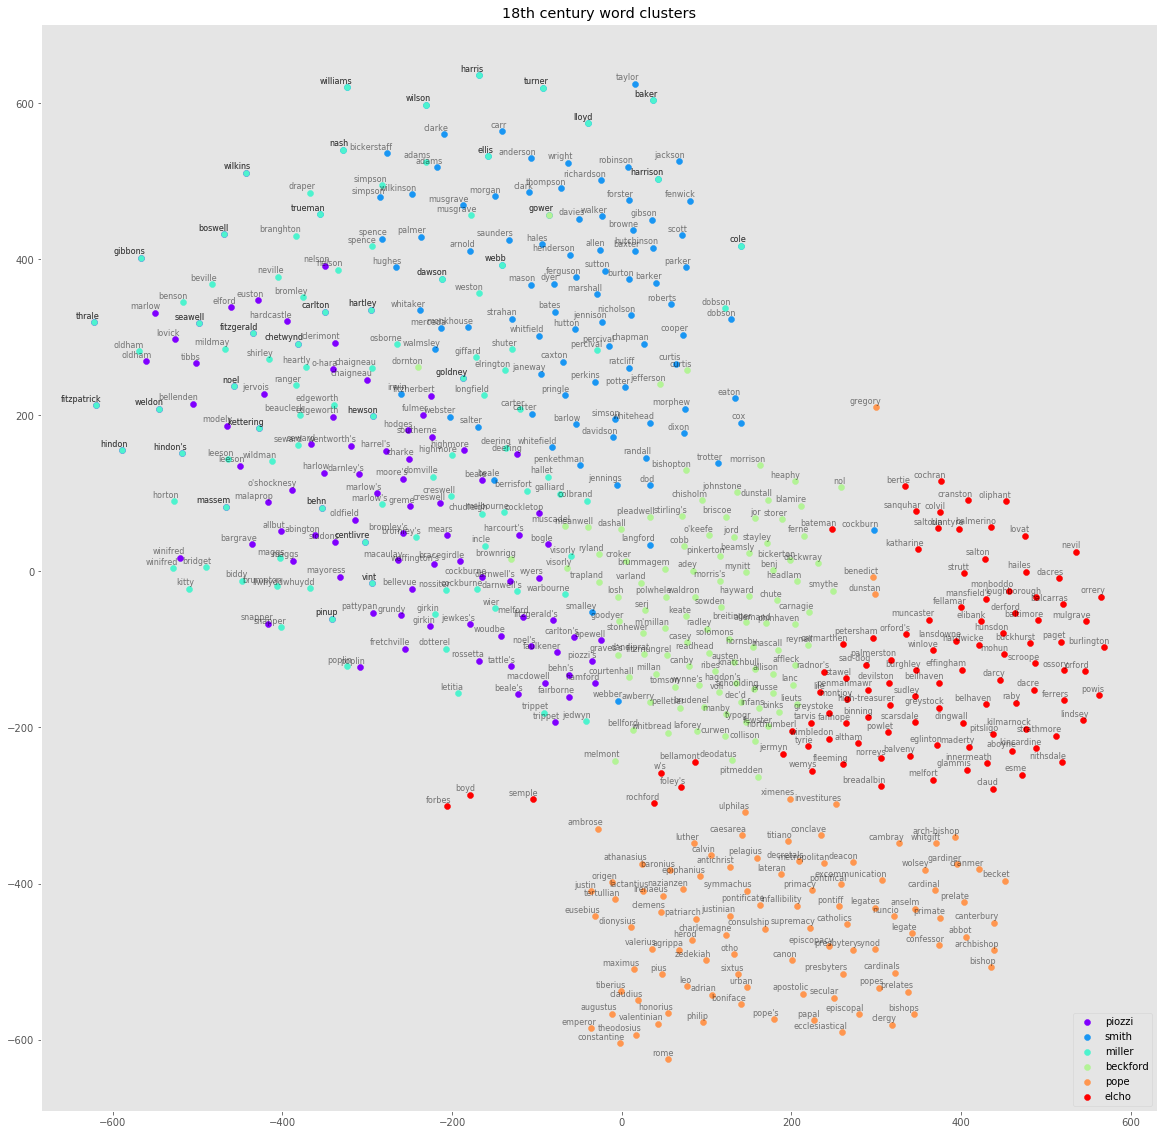

In [230]:
tsne_plot_similar_words('18th century word clusters', name_keys, embeddings_en_2d, word_clusters, 1.0,
                        filename='name_clusters_perp50_iters7000_dpi400.png')

## More pandas

In [231]:
TRAVELERS_FP = os.path.join("GTE_exports", "all", "Travelers_all.tsv")
TRAVELERS_ITINERARIES_FP = os.path.join("GTE_exports", "all", "Travelers_Itineraries_all.tsv")
TRAVELERS_LIFE_EVENTS_FP = os.path.join("GTE_exports", "all", "Travelers_Life_Events_all.tsv")

In [232]:
travelers_all = pd.read_csv(
    TRAVELERS_FP, 
    sep="\t", 
    index_col="index")

travelers_itineraries_all = pd.read_csv(
    TRAVELERS_ITINERARIES_FP, 
    sep="\t", 
    index_col="entryID")

travelers_life_events_all = pd.read_csv(
    TRAVELERS_LIFE_EVENTS_FP, 
    sep="\t", 
    index_col="entryID")

Some helpful pandas string methods

[contains](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html#pandas.Series.str.contains)

[startswith](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.startswith.html#pandas.Series.str.startswith)


[endswith](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.endswith.html#pandas.Series.str.endswith)

[split](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html#pandas.Series.str.split)


Comprehensive [overview](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) of working with text data in pandas



In [233]:
#make a boolean filter for people whose name in the GTE begins with the string 'Capt'
captains_filter = travelers_all['travelerNames'].str.startswith('Capt')

In [234]:
#it is a series of False and True values, one for each entry in the GTE
captains_filter

index
0.0       False
1.0       False
1.1       False
2.0       False
3.0       False
4.0       False
6.0       False
7.0       False
8.0       False
9.0       False
10.0      False
12.0      False
13.0      False
15.0      False
16.0      False
17.0      False
18.0      False
18.1      False
18.2      False
18.3      False
18.4      False
18.5      False
19.0      False
20.0      False
21.0      False
22.0      False
23.0      False
23.1      False
24.0      False
25.0      False
          ...  
5267.4    False
5267.5    False
5268.0    False
5269.0    False
5270.0    False
5272.0    False
5273.0    False
5274.0    False
5275.0    False
5277.0    False
5278.0    False
5278.1    False
5278.2    False
5279.0    False
5280.0    False
5281.0    False
5283.0    False
5283.1    False
5284.0    False
5285.0    False
5286.0    False
5286.1    False
5286.2    False
5286.3    False
5286.4    False
5287.0    False
5288.0    False
5289.0    False
5290.0    False
5290.1    False
Name: travelerName

In [235]:
captains_filter.shape

(6005,)

In [236]:
#now apply the filter
travelers_all[captains_filter]

,travelerNames,gender,birthDate,deathDate,birthPlace,deathPlace,parents,sources,eventsIndex,matchedMentions,unmatchedMentions,matchedMentionsEntryIndexes
index,,,,,,,,,,,,
96.0,Capt. Anstruther,Male,NaN,NaN,NaN,NaN,NaN,ASN CRA 1259,NaN,Countess Mahony;Count Mahony,NaN,"3134,3136"
103.0,Capt. Marriot Arbuthnot,Male,1711.0,1794.0,NaN,NaN,NaN,Wal.Corr.,"205,206,207,208,209,210,211",Henry Conway;Horace Mann;Mrs Arbuthnot;Sister ...,NaN,"1094,3169,103.1,103.2"
106.0,Capt. Thomas Archdeacon,Male,NaN,NaN,NaN,NaN,NaN,Hughan,NaN,NaN,NaN,NaN
190.0,Capt. Baillie,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capt. Troubridge,Duke of Salandra,4848
197.0,Capt. George Balchen,Male,NaN,1745.0,NaN,NaN,NaN,NaN,NaN,Temple West,NaN,5076
205.0,Capt. Alexander John Ball,Male,1757.0,1809.0,NaN,Malta,NaN,Morrison,"405,406,407,408,409",Lady Hamilton;Lady Knight;Nelson;Miss Cornelia...,Cardinal Ruffo,"2205,2803,3537,2800,4848"
239.1,Captain Patrick Browne,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ralph Barker;Richard Rawlinson,NaN,"239,4040"
251.0,Capt. Barnard,Male,NaN,NaN,NaN,NaN,NaN,ASV,NaN,Lord Hervey;Lady Hervey;David Sutherland,"Ferdinand IV, King of Naples","2388,2388.1,4641"
255.0,Capt. James Barnes,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capt. Alexander Farquharson,NaN,1665


In [247]:
#or we can do what we did above in one line (i.e. without making a separate variable called 'captains filter')
captain_travelers = travelers_all[ travelers_all['travelerNames'].str.startswith('Capt') ]
gen_travelers = travelers_all[ travelers_all['travelerNames'].str.startswith('Gen.') ]
col_travelers = travelers_all[ travelers_all['travelerNames'].str.startswith('Col.') ]


In [251]:
gen_travelers

,travelerNames,gender,birthDate,deathDate,birthPlace,deathPlace,parents,sources,eventsIndex,matchedMentions,unmatchedMentions,matchedMentionsEntryIndexes
index,,,,,,,,,,,,
1593.0,Gen. Elliot,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1784.0,Gen. Fordice,Male,NaN,NaN,NaN,NaN,NaN,"HMC Stuart,Tayler 1938",NaN,NaN,NaN,NaN
1796.0,Gen. Thomas Forster,Male,NaN,NaN,NaN,NaN,NaN,"HMC,HMC Stuart,Tayler 1938","3562,3563,3564",William Erskine;Andrew Ramsay;Lancelot Allgood...,NaN,"1628,4028,63,84,229,3183,2648,2322"
2041.0,Gen. William Graeme,Male,NaN,1767.0,NaN,NaN,James Graeme of Bucklyvie,"Boswell, Italy,Fleming, Adam,Martin jnl.MSS,Mo...","4011,4012",Lady Mary Wortley Montagu;Robert Adam;James Ad...,Marshal Schulenberg;Lady Bute;Algarotti;Pietro...,"3395,23,21,4417,3208,5066,3472,509,725"
2107.0,Gen. Grenville,Male,NaN,NaN,NaN,NaN,NaN,Holland Jnl.,NaN,John Trevor,NaN,4839
2154.0,Gen. Gunning,Male,NaN,NaN,NaN,NaN,NaN,Parker list MSS,NaN,Mrs Rebecca Duberly,NaN,2154.1
2494.0,Gen. Honeywood,Male,NaN,NaN,NaN,NaN,NaN,ASN CRA 1259,NaN,NaN,NaN,NaN
2703.0,Gen. James Johnston,Male,1721.0,1797.0,NaN,NaN,NaN,"Gazz.Tosc.,Wal.Corr.","5281,5282,5283,5284,5285",Horace Mann;Henrietta Cecilia West,NaN,"3169,2703.1"
2984.0,Gen. Henry Humphrey Evans Lloyd,Male,1729.0,1785.0,Wales,NaN,NaN,"Verri, Cart.","5735,5736,5737,5738,5739,5740,5741",NaN,Alessandro Verri;Pietro Verri;Gen. Paoli,NaN


In [238]:
#now lets get the entryIDs of all the captains, so we can then use these in the life_events and itineraries dataframes
#to find captain life_events and captain itineraries

captain_IDs = list(set(captain_travelers.index.values))

In [189]:
type(captain_IDs)

list

In [190]:
type(captain_IDs[0])

numpy.float64

In [239]:
#now we can use the .loc (probably short for 'locate'?) method on any of our three dataframes to
#get all and only the rows whose index/entryID matches the ones in our list of captain IDs

#get all recorded captain life_events
captain_life_events = travelers_life_events_all.loc[captain_IDs]

In [240]:
captain_life_events 

,travelerNames,birthDate,deathDate,gender,lifeEvents,eventsDetail1,eventsDetail2,place,startDate,endDate,eventsIndex
entryID,,,,,,,,,,,
2569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2064.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2577.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3090.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3601.0,Capt. John Northall,1723.0,1759.0,Male,occupation,Army and Navy,army officer,NaN,NaN,NaN,6866.0
3601.0,Capt. John Northall,1723.0,1759.0,Male,military career,army,NaN,NaN,NaN,NaN,6867.0
3601.0,Capt. John Northall,1723.0,1759.0,Male,military career,army,Cadet,NaN,1741,NaN,6868.0


In [241]:
#now get all recorded captain itineraries
captain_itineraries = travelers_itineraries_all.loc[captain_IDs]

In [242]:
captain_itineraries

,travelerNames,birthDate,deathDate,gender,travelPlace,coordinates,startDate,endDate,startYear,startMonth,startDay,endYear,endMonth,endDay,markers,travelIndex
entryID,,,,,,,,,,,,,,,,
2569.0,Capt. Edward Hughes,NaN,NaN,Male,Venice,"45.43811,12.31814957",1761-11-17,1761-12-1,1761.0,11.0,17.0,1761.0,12.0,1.0,NaN,0
2569.0,Capt. Edward Hughes,NaN,NaN,Male,Bologna,"44.504822,11.34517956",1761-12-4,1761-12-4,1761.0,12.0,4.0,1761.0,12.0,4.0,NaN,1
4106.0,Capt. Robins,NaN,NaN,Male,Verona,"45.43815833,10.99374167",1796-7-15,1796-7-16,1796.0,7.0,15.0,1796.0,7.0,16.0,NaN,0
1038.0,Capt. Cole,NaN,NaN,Male,Rome,"41.89305556,12.48277778",1729-4-7,1729-4-7,1729.0,4.0,7.0,1729.0,4.0,7.0,NaN,0
2064.0,Capt. John Grant,NaN,NaN,Male,Venice,"45.43811,12.31814957",1795-11-6,1795-11-13,1795.0,11.0,6.0,1795.0,11.0,13.0,NaN,0
2577.0,Capt. Hume,NaN,NaN,Male,Naples,"40.840141,14.25226021",1788-12-2,1788-12-2,1788.0,12.0,2.0,1788.0,12.0,2.0,NaN,0
3090.0,Capt. MacDonald,NaN,NaN,Male,Corsica,"42.148235,9.102701187",1794-1-01,1794-8-01,1794.0,1.0,NaN,1794.0,8.0,NaN,NaN,0
3090.0,Capt. MacDonald,NaN,NaN,Male,Florence,"43.77138889,11.25416667",1794-1-01,1794-8-01,1794.0,1.0,NaN,1794.0,8.0,NaN,NaN,1
3090.0,Capt. MacDonald,NaN,NaN,Male,Verona,"45.43815833,10.99374167",1794-8-12,1794-8-14,1794.0,8.0,12.0,1794.0,8.0,14.0,NaN,2


In [243]:
#if we want to change how our dataframes are indexed, we can use set_index
#but note that there is not a one-to-one correspondence between travelers in the GTE and names
#in general, this is why we index each row of our dataframes by the unique identifier of the traveler, namely their entryID
captain_travelers_indexed_by_name = captain_travelers.set_index('travelerNames')

In [244]:
captain_travelers_indexed_by_name

,gender,birthDate,deathDate,birthPlace,deathPlace,parents,sources,eventsIndex,matchedMentions,unmatchedMentions,matchedMentionsEntryIndexes
travelerNames,,,,,,,,,,,
Capt. Anstruther,Male,NaN,NaN,NaN,NaN,NaN,ASN CRA 1259,NaN,Countess Mahony;Count Mahony,NaN,"3134,3136"
Capt. Marriot Arbuthnot,Male,1711.0,1794.0,NaN,NaN,NaN,Wal.Corr.,"205,206,207,208,209,210,211",Henry Conway;Horace Mann;Mrs Arbuthnot;Sister ...,NaN,"1094,3169,103.1,103.2"
Capt. Thomas Archdeacon,Male,NaN,NaN,NaN,NaN,NaN,Hughan,NaN,NaN,NaN,NaN
Capt. Baillie,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capt. Troubridge,Duke of Salandra,4848
Capt. George Balchen,Male,NaN,1745.0,NaN,NaN,NaN,NaN,NaN,Temple West,NaN,5076
Capt. Alexander John Ball,Male,1757.0,1809.0,NaN,Malta,NaN,Morrison,"405,406,407,408,409",Lady Hamilton;Lady Knight;Nelson;Miss Cornelia...,Cardinal Ruffo,"2205,2803,3537,2800,4848"
Captain Patrick Browne,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ralph Barker;Richard Rawlinson,NaN,"239,4040"
Capt. Barnard,Male,NaN,NaN,NaN,NaN,NaN,ASV,NaN,Lord Hervey;Lady Hervey;David Sutherland,"Ferdinand IV, King of Naples","2388,2388.1,4641"
Capt. James Barnes,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capt. Alexander Farquharson,NaN,1665


In [252]:
captain_travelers

,travelerNames,gender,birthDate,deathDate,birthPlace,deathPlace,parents,sources,eventsIndex,matchedMentions,unmatchedMentions,matchedMentionsEntryIndexes
index,,,,,,,,,,,,
96.0,Capt. Anstruther,Male,NaN,NaN,NaN,NaN,NaN,ASN CRA 1259,NaN,Countess Mahony;Count Mahony,NaN,"3134,3136"
103.0,Capt. Marriot Arbuthnot,Male,1711.0,1794.0,NaN,NaN,NaN,Wal.Corr.,"205,206,207,208,209,210,211",Henry Conway;Horace Mann;Mrs Arbuthnot;Sister ...,NaN,"1094,3169,103.1,103.2"
106.0,Capt. Thomas Archdeacon,Male,NaN,NaN,NaN,NaN,NaN,Hughan,NaN,NaN,NaN,NaN
190.0,Capt. Baillie,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capt. Troubridge,Duke of Salandra,4848
197.0,Capt. George Balchen,Male,NaN,1745.0,NaN,NaN,NaN,NaN,NaN,Temple West,NaN,5076
205.0,Capt. Alexander John Ball,Male,1757.0,1809.0,NaN,Malta,NaN,Morrison,"405,406,407,408,409",Lady Hamilton;Lady Knight;Nelson;Miss Cornelia...,Cardinal Ruffo,"2205,2803,3537,2800,4848"
239.1,Captain Patrick Browne,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ralph Barker;Richard Rawlinson,NaN,"239,4040"
251.0,Capt. Barnard,Male,NaN,NaN,NaN,NaN,NaN,ASV,NaN,Lord Hervey;Lady Hervey;David Sutherland,"Ferdinand IV, King of Naples","2388,2388.1,4641"
255.0,Capt. James Barnes,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capt. Alexander Farquharson,NaN,1665


## Discussion
### What kinds of visualizations could we make with this information on captains?






### What ideas do you have for visualizing the data you are working with?

## Copy-pasting code

We will experiment with copy-pasting and tweaking code for visualizations that look interesting to us. See this [gallery for the networkx package](https://networkx.github.io/documentation/stable/auto_examples/)

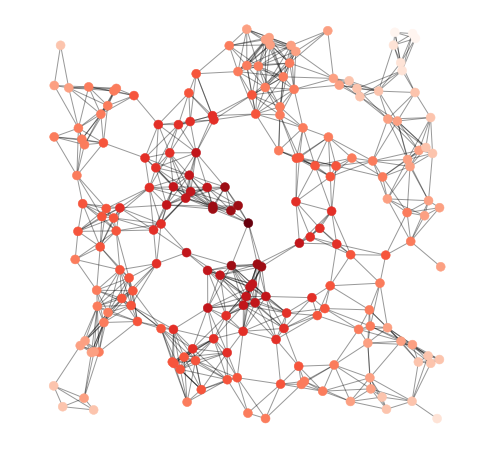

In [19]:
G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()